In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

df = pd.read_csv(r"C:\Users\admin\Desktop\Datasets\stock_details_5_years.csv") 

In [5]:
print(df.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Company         0
dtype: int64


In [9]:
df.set_index('Date', inplace=True)

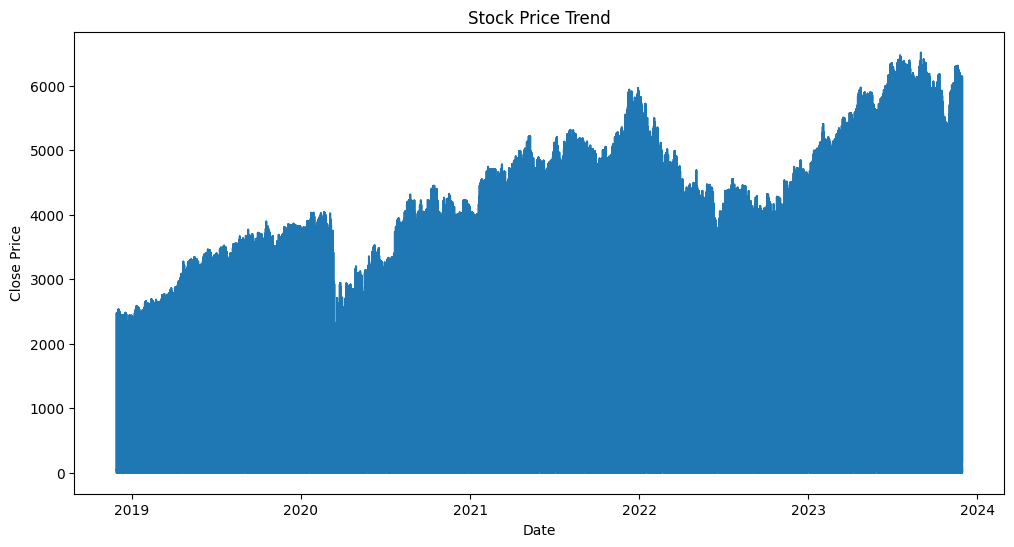

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Trend')
plt.show()

In [12]:
ma_short = df['Close'].rolling(window=50).mean() 
ma_long = df['Close'].rolling(window=200).mean()

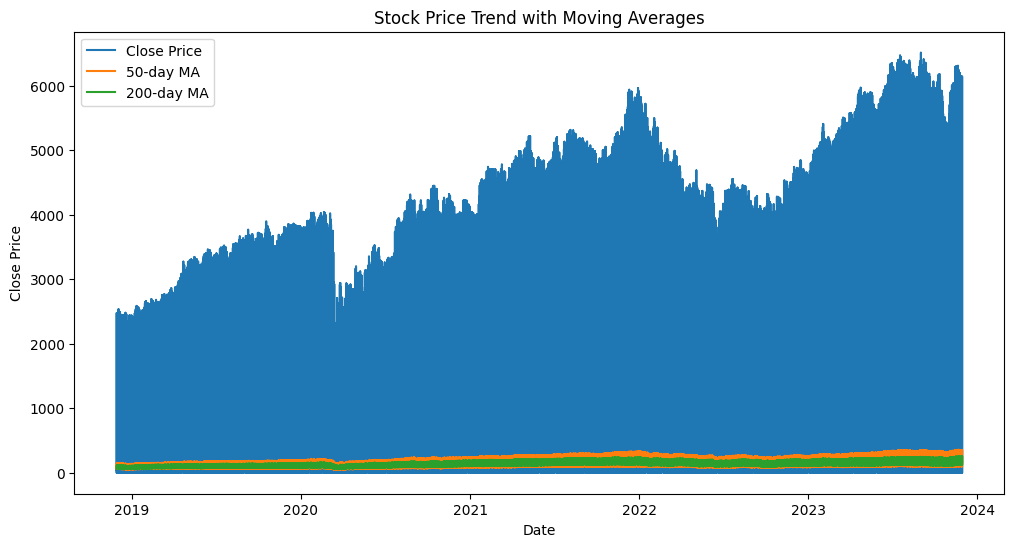

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(ma_short, label='50-day MA')
plt.plot(ma_long, label='200-day MA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Trend with Moving Averages')
plt.legend()
plt.show()

In [14]:
df['Daily_Return'] = df['Close'].pct_change()

In [15]:
volatility = df['Daily_Return'].std()

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose 

# ... (rest of your code)

# Decompose Time Series (optional)
try:
    decomposition = seasonal_decompose(df['Close'], model='additive', period=30) 
    # ... (rest of the plotting code)

except ImportError as e:
    print(f"Error: {e}. Please install the 'statsmodels' library.")

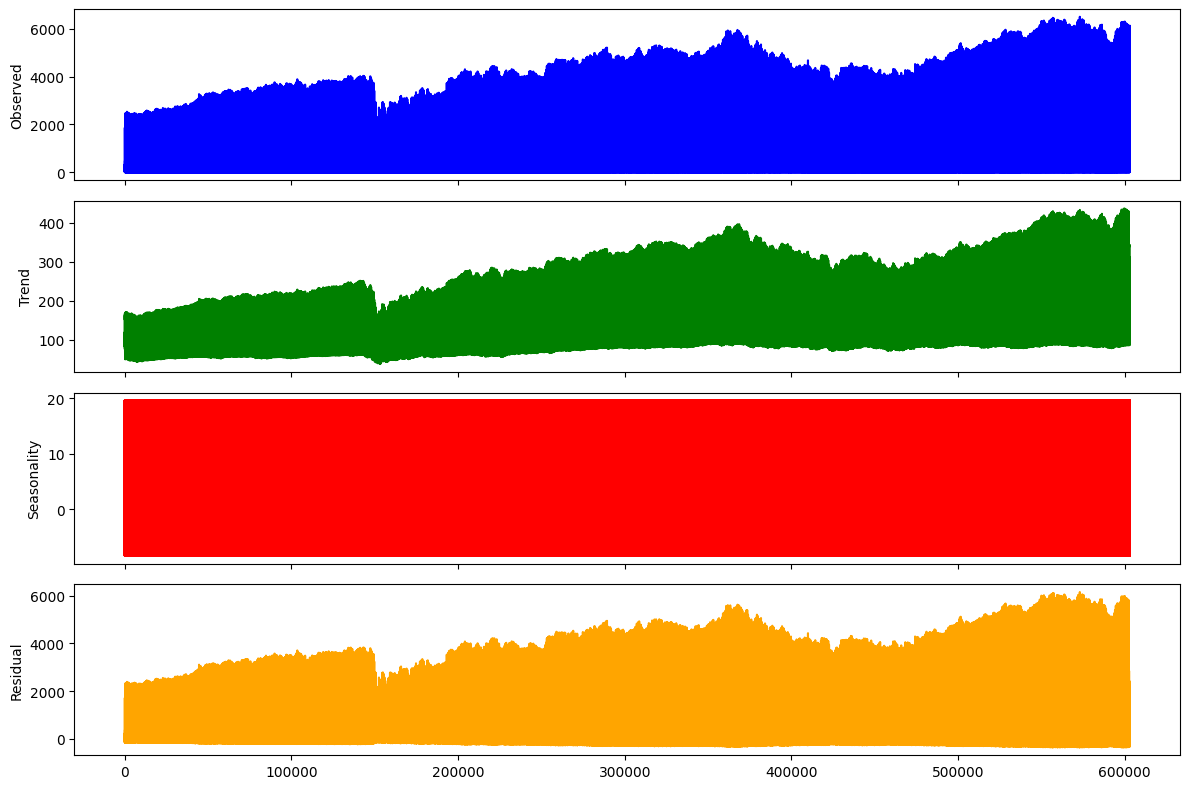

In [8]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(12, 8))

# Change the color of the observed data (ax1)
decomposition.observed.plot(ax=ax1, legend=False, color='blue')  # Set color to blue

# Change the color of the trend (ax2)
decomposition.trend.plot(ax=ax2, legend=False, color='green')  # Set color to green

# Change the color of the seasonality (ax3)
decomposition.seasonal.plot(ax=ax3, legend=False, color='red')  # Set color to red

# Change the color of the residuals (ax4)
decomposition.resid.plot(ax=ax4, legend=False, color='orange')  # Set color to orange

ax1.set_ylabel('Observed')
ax2.set_ylabel('Trend')
ax3.set_ylabel('Seasonality')
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

In [24]:
volatility = df['Daily_Return'].std()
print(f"Volatility: {volatility}")


Volatility: 11.865934897151405


In [12]:
pip install yfinance

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     --------------------- ---------------- 524.3/948.2 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 948.2/948.2 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.8 MB ? eta -:--:--
   -------- ------------------------------- 0.8/3.8 MB 2.8 MB/s eta 0:00:02
   ------------- -------------------------- 1.3/3.8 MB 2.0 MB/s eta 0:00:02
   -------------------

[*********************100%***********************]  1 of 1 completed


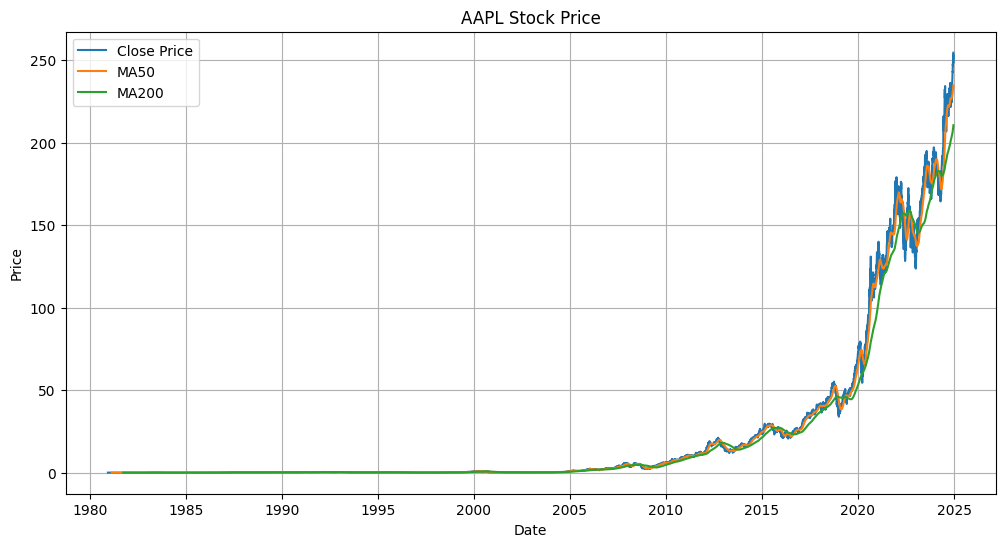

In [13]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the stock ticker symbol
ticker_symbol = 'AAPL'  # Replace with the desired stock symbol

# Download historical data
data = yf.download(ticker_symbol)

# Calculate moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Plot stock price and moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA50'], label='MA50')
plt.plot(data['MA200'], label='MA200')
plt.legend()
plt.title(f'{ticker_symbol} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed


Volatility: 0.0278


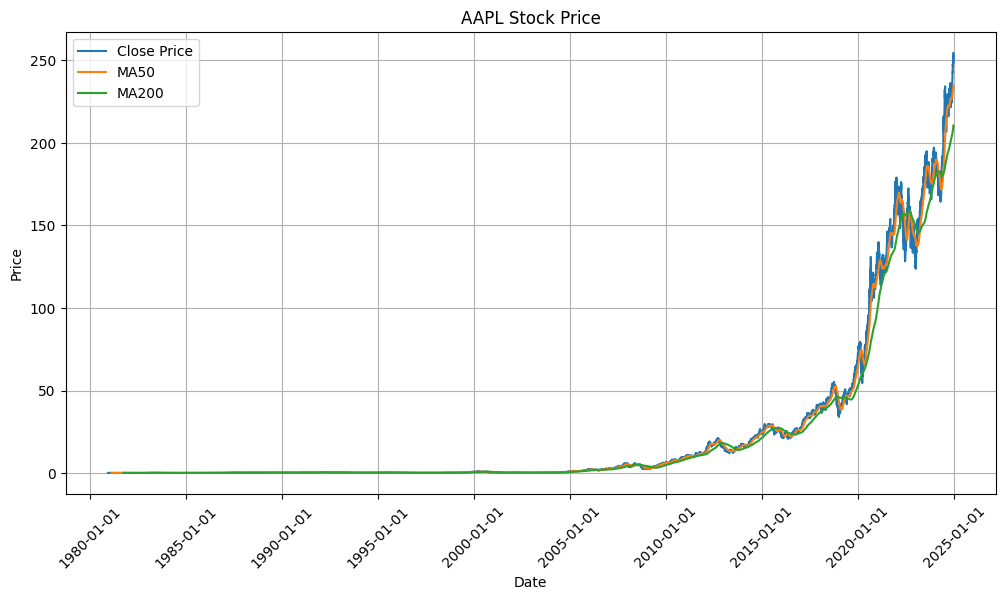

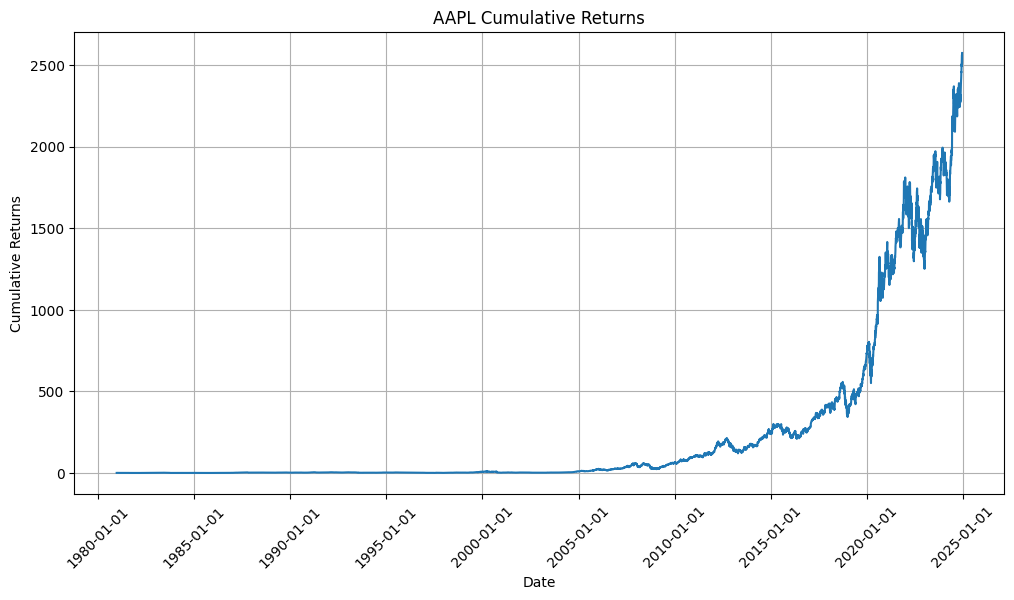

In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Define the stock ticker symbol
ticker_symbol = 'AAPL'  # Replace with the desired stock symbol

# Download historical data
data = yf.download(ticker_symbol)

# Calculate moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change()

# Calculate cumulative returns
data['Cumulative Return'] = (1 + data['Daily Return']).cumprod() - 1

# Calculate volatility (standard deviation of daily returns)
volatility = data['Daily Return'].std()

# Print volatility
print(f"Volatility: {volatility:.4f}")

# Plot stock price and moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA50'], label='MA50')
plt.plot(data['MA200'], label='MA200')
plt.legend()
plt.title(f'{ticker_symbol} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

# Format x-axis dates
date_format = DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.show()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative Return'])
plt.title(f'{ticker_symbol} Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)

# Format x-axis dates
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.show()

In [16]:
pip install ta


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29421 sha256=87d34436725cb925f6785b537a690dd4c9d888b3e802aea2d8fe5aa68eed1f3c
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\e3\3a\ee\4955a26c90a4b7deb6d725dc8ec7b8604a7aef44e43a2e8af7
Successfully built ta
